### Note:

**Probability mass function** $f(X=x)\implies$ **discrete** random variable

**Probability density function** $f(a<x<b)\implies$ **continuous** random variable

**Probability distribution function** aka cdf

- X is a **discrete** random variable $\implies P(X<a) = \sum_{i=0}^{a}f(x)$
- X is a **continuous** random variable $\implies P(X<a) = \int_{0}^{a}f(x)$

___
# 1. Discrete Uniform Distribution

- If we have an experiment with $n$ possible outcomes and each is equally likely, then the random variable $X$ is uniformly distributed

- The probability of each outcome is $\frac{1}{n}$

- **Note**: if there are countably infinitely many possible outcomes, the uniform distribution does not describe the random variable

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

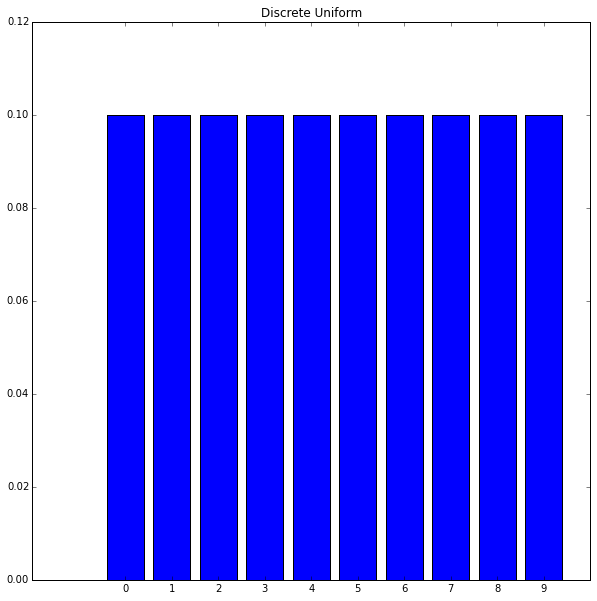

In [20]:
x = np.arange(10)
y = 1/float(len(x))*np.ones(len(x))
plt.bar(x,y, align = 'center')
plt.xticks(x)
plt.title('Discrete Uniform')
plt.show()

___
# 2. Binomial Distribution

- If we have an experiment of $n$ successive Bernoulli trials each with probability of success $p$, we use the Binomial function to model its distribution

# $b(n,p,k) = \binom{n}{k}p^{k}(1-p)^{n-k}$

In [21]:
from math import factorial

In [22]:
def b(n,p,k):
    q = 1-p
    choice = float(factorial(n))/(factorial(n-k)*factorial(k))
    return choice*(p**k)*(q**(n-k))

In [23]:
b = np.vectorize(b)

In [33]:
x = np.arange(11)

p1 = 0.75
y1 = b(10,p1,x)

p2 = 0.5
y2 = b(10,p2,x)

p3 = 0.25
y3 = b(10,p3,x)

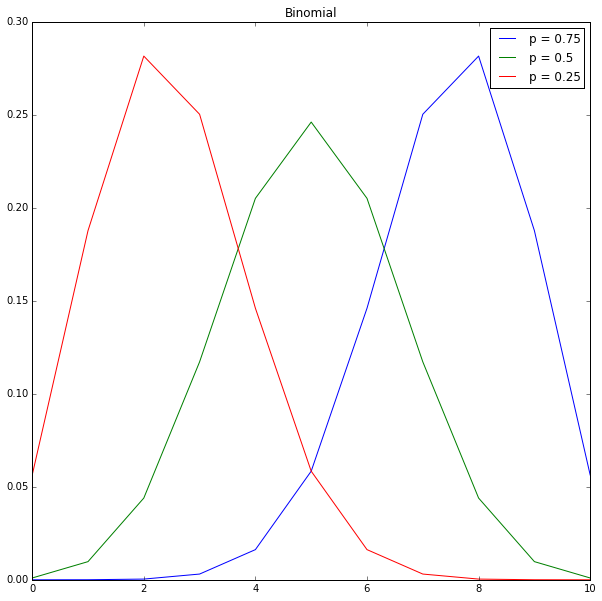

In [45]:
plt.plot(x,y1, label = 'p = '+str(p1))
plt.plot(x,y2,label = 'p = '+str(p2))
plt.plot(x,y3,label = 'p = '+str(p3))
plt.legend()
plt.title('Binomial')
plt.show()

___
# 3. Geometric Distribution

- Imagine an experiment similar to the one for the Binomial distribution, except we **repeat the experiment forever**

- Instead of counting the number of successes, we count the number of experiments until we achieve success
    - Let $T$ be the random variable representing the first success
    
- Then:

## $P(T=1) = p$

## $P(T=2) = (1-p)p$

## $P(T=3) = (1-p)^{2}p$

## ...

## $P(T=n) = (1-p)^{n-1}p$

- For this to be a distribution, we need the infinite series $\sum_{i=0}^{\infty}p(1-p)^{i}$ to be equal to 1
    - But $\sum_{i=0}^{\infty}p(1-p)^{i} = p\frac{1-(1-p)^{\infty}}{1-(1-p)} = p\frac{1-0}{p} = 1$

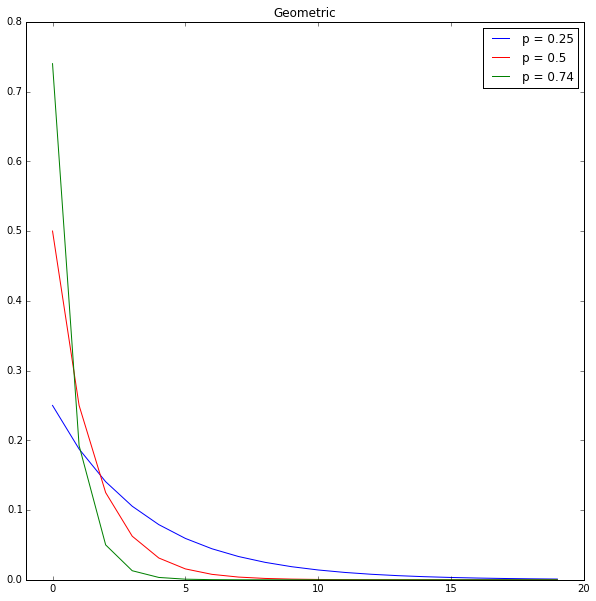

In [50]:
x = np.arange(20)
colors = ['b','r','g']

for i, p in enumerate([0.25, 0.5, 0.74]):
    c = colors[i]
    y = p*((1-p)**x)
    plt.plot(x,y,label = 'p = '+str(p), color = c)
plt.legend()
plt.xlim([-1,20])
plt.title('Geometric')
plt.show()

### Example

- The Geometric distribution plays an important role in the theory of queues

- Suppose a line of customers waits for service at a counter
    - It is generally assumed that for any time unit, either 0 or 1 customer(s) arrives at the counter
    
- Let $p$ represent the probability of a customer arriving at the counter

- **Then, P(T=t), where T represents the time of the next customer arriving, is geometrically distributed!**

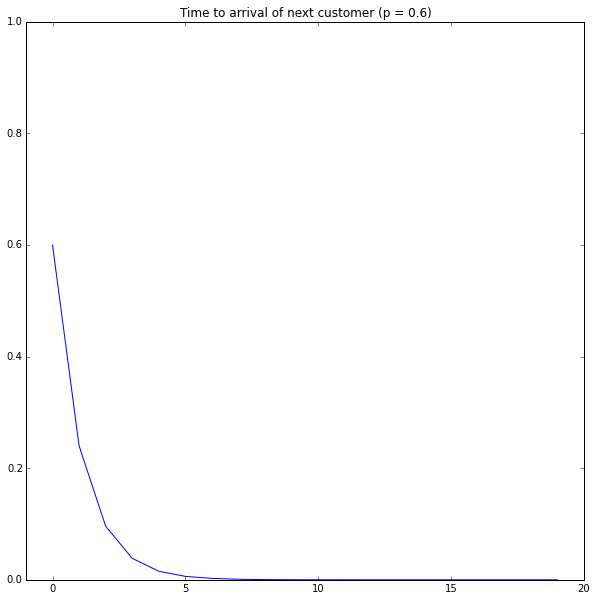

In [52]:
p = 0.6
x = np.arange(20)
y = p*((1-p)**x)
plt.plot(x,y)
plt.xlim([-1,20])
plt.ylim([0,1])
plt.title('Time to arrival of next customer (p = '+str(p)+')')

In [58]:
pd.DataFrame({'Time':x,'Prob.':y})

Prob.  Time
0   6.000000e-01     0
1   2.400000e-01     1
2   9.600000e-02     2
3   3.840000e-02     3
4   1.536000e-02     4
5   6.144000e-03     5
6   2.457600e-03     6
7   9.830400e-04     7
8   3.932160e-04     8
9   1.572864e-04     9
10  6.291456e-05    10
11  2.516582e-05    11
12  1.006633e-05    12
13  4.026532e-06    13
14  1.610613e-06    14
15  6.442451e-07    15
16  2.576980e-07    16
17  1.030792e-07    17
18  4.123169e-08    18
19  1.649267e-08    19

- So, we can see that the probability that the next customer will arrive in the first second is 0.6
    - The probability that the first customer will arrive in the second second is 0.24
        - And so on...

### Now, let's consider the amount of time it takes to serve a customer

#### Let $p^{*}$ represent the probability of wrapping up with the customer in a given unit of time

- Then, given the next customer was seen at time $t$, the time taken to service the customer has random variable $T^{*}$

### Combining these two, we get:

# $P(T^{*}>s|T>r) = \frac{P(T^{*}>s \cap T>r)}{P(T>r)}$

# $P(T^{*}>s \cap T>r) = \left ( \sum^{\infty}_{i=s+1}p^{*}(1-p^{*})^{i} \right )\cdot \left ( \sum^{\infty}_{i=r+1}p(1-p)^{i} \right )$

### But $\sum^{\infty}_{i=s+1}p^{*}(1-p^{*})^{i} = p^{*}(1-p^{*})^{s+1}\sum^{\infty}_{i=0}(1-p^{*})^{i} =  p^{*}(1-p^{*})^{s+1} \frac{1}{p^{*}} = (1-p^{*})^{s+1}$

### Similarly $\sum^{\infty}_{i=r+1}p(1-p)^{i} = (1-p)^{r+1}$

## Therefore $P(T^{*}>s \cap T>r) = (1-p^{*})^{s+1}(1-p)^{r+1}$

## Putting it all together: 

# $P(T^{*}>s|T>r) = \frac{(1-p^{*})^{s+1}(1-p)^{r+1}}{(1-p)^{r+1}} = (1-p^{*})^{s+1}$

## Therefore the servicing time is *memoryless* i.e. independent of how long it took for the customer to arrive at the counter

___

# 4. Negative Binomial Distribution

### We have a coin which has a probability $p$ of coming up heads

### We pick some integer $k$

### We want to study the number of flips required to get $k$ heads

## Let $X$ represent the number of flips

### If $k=1$, $X$ follows the geometric distribution (number of flips until first success)

### For an arbirtrary $k$ value, we say that $X$ follows a Negative Binomial distribution

- Let $k = 5$
    - Then, we know that $P(X=x) = 0$ for all $x$ in $[0,4]$ since it's impossible to get 5 heads in less than 5 flips
    - We also know that $P(X=5) = p^{5}$ since there's only one way to get 5 heads in a row
    - For all $x$ in $[6,7,8,9,...]$, we need to assign the 4 heads to the $k-1$ flips before the $k^{th}$ successful flip
        - Therefore $P(X=x) = p\cdot\binom{x-1}{k-1}p^{k-1}(1-p)^{x-k}$

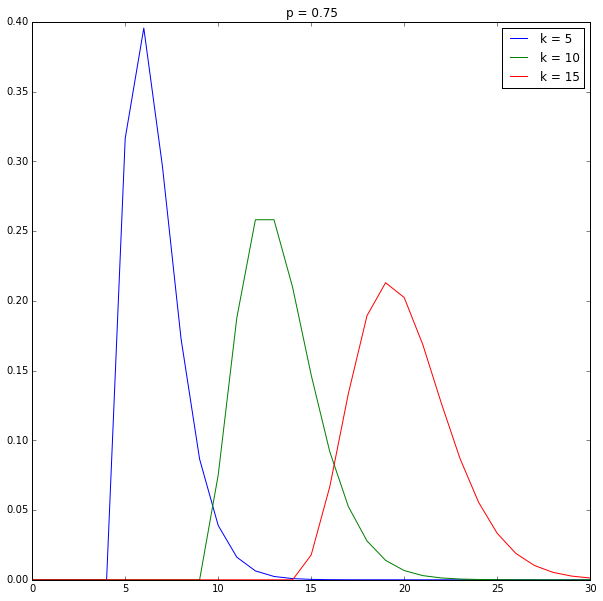

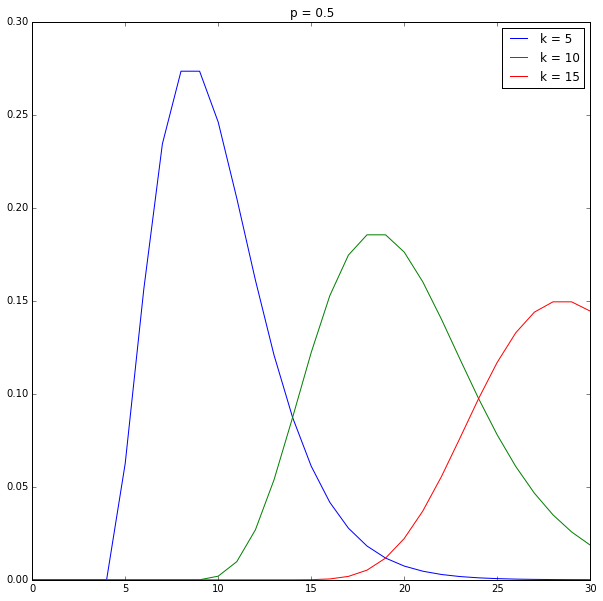

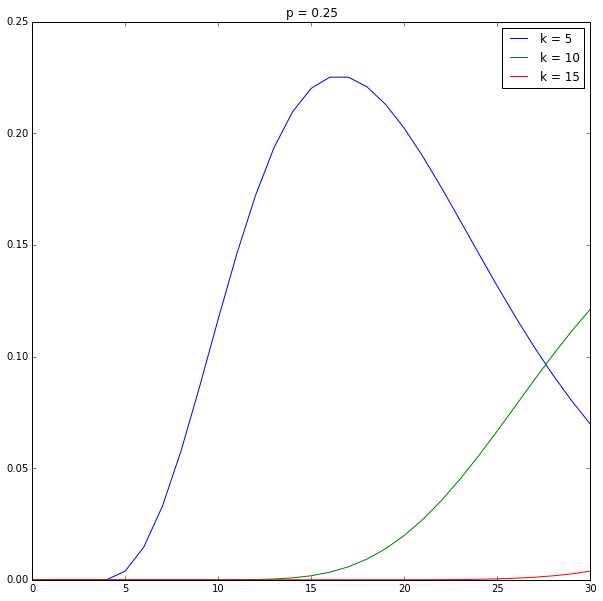

In [66]:
x = np.arange(31)

for p in [0.75, 0.5, 0.25]:
    for k in [5, 10, 15]:
        y = []
        for i in range(31):
            if i<k:
                y.append(0)
            else:
                val = (float(factorial(i-1))/(factorial(k-1)*factorial(i-k)))*(p**(k-1))*((1-p)**(i-k))
                y.append(val)
        plt.plot(x,y,label = 'k = '+str(k))
    plt.legend()
    plt.title('p = '+str(p))
    plt.xlim([0,30])
    plt.show()

### Example

- A fair coin is tossed until the second head turns up
    - What is the expected number of tosses required?

In [70]:
k = 2
p = 0.5
cum_sum = 0

for i in range(26):
    if i<k:
        val = 0
    else:
        choice = float(factorial(i-1))/(factorial(k-1)*factorial(i-k))
        val = (p**k)*((1-p)**(i-k))*choice
    cum_sum += val
    if cum_sum>0.5:
        break
    print('x = '+str(i))
    print('Probability of getting head '+str(k)+' on flip '+str(i)+' = '+str(val))
    print('Cumulative Probability = '+str(cum_sum))
    print('\n')
    

x = 0
Probability of getting head 2 on flip 0 = 0
Cumulative Probability = 0


x = 1
Probability of getting head 2 on flip 1 = 0
Cumulative Probability = 0


x = 2
Probability of getting head 2 on flip 2 = 0.25
Cumulative Probability = 0.25


x = 3
Probability of getting head 2 on flip 3 = 0.25
Cumulative Probability = 0.5




**Three flips**

- We can confirm this by simulation

In [83]:
def sim():
    count_H = 0
    for i in range(300):
        count_H += np.random.randint(2)
        if count_H==2:
            return i

In [102]:
results = []
for i in range(100000):
    results.append(sim())    
print(np.mean(results))

3.00622


___

# 5. Poisson Distribution

- The three most important discrete distributions are:
    1. Uniform
    2. Binomial
    3. **Poisson**

- The continuous poisson distribution can be thought of as an extension of the **exponential density**
- The discrete poisson distribution can be thought of as an extension of the **binomial distribution**
    - This is what we'll consider now (continuous in the next section)
    
### We use the Poisson distribution instead of the binomial distribution (where possible) because:

#### 1. It is easier to calculate

#### 2. We can combine two random variables with different $p$ values more easily

- The poisson distribution is really good for modelling events that **could happen many times** (in theory), but are **very rare** (in practice)

### Suppose that we're considering the number of phone calls that come into a police station

#### We want to know the probability of receiving more than 10 phone calls in a 5 minute period

**Assumptions**

1. The average rate $\lambda$ of phone calls is **constant**
    - If the rate is higher between hours 5PM-6PM than 6PM-7PM, we need to use two different $\lambda$ values
    
2. The number of phone calls in non-overlapping intervals is **independent**
    - This means that getting 10 phone calls from 5:00-5:10 has no impact on how many calls will be received from 5:10-5:15

### We break the time interval up into $n$ subintervals of equal length

#### These subintervals are small enough that we assume the probability of two events occurring in a single subinterval is negligible

- So we model each subinterval as 1 or 0 (1 meaning a call came in, 0 means the phone never rang)

- We can see these subintervals can be thought of as a **series of Bernoulli trials**


### So how do we decide what the value of $p$ should be?

- If the average rate of phone calls is $\lambda$ and we're considering a period of length $t$, the expected number of phone calls is equal to $\lambda t$

- And we divided our interval of length $t$ into $n$ subintervals

### Therefore $\lambda t = np \implies p = \frac{t}{n}\lambda$

### Now, we let $X$ be the random variable representing the number of phone calls received during our specified time interval

### For simplicity, let $t = 1$ ; we can scale our result up later

#### Then $P(X=0) = b(n,p,0) = \binom{n}{0}p^{0}(1-p)^{n} = (1-p)^{n} = (1-\frac{\lambda}{n})^{n}$

## Recall:

## $\lim_{x\rightarrow \infty}\left(1 + \frac{1}{x} \right )^{x} = e^{-1}$

- We can use this to conclude that, for large $n$, $P(X=0) = (1-\frac{\lambda}{n})^{n} = e^{-\lambda}$

- **What does this mean?**
    - If we split the interval $t$ into many very very small subintervals, $n\rightarrow \infty$ so we can approximate the probability of no calls by $e^{-\lambda}$
    
    
### Now, we consider $P(X=1)$

#### $P(X=1) = b(n,p,1) = \binom{n}{1}p(1-p)^{n-1} = n(\frac{\lambda}{n})(1-\frac{\lambda}{n})^{n-1} = \lambda(1-\frac{\lambda}{n})^{n-1} \approx \lambda(1-\frac{\lambda}{n})^{n} = \lambda e^{-\lambda}$

### Next, $P(X=2)$

#### $P(X=2) = b(n,p,2) = \binom{n}{2}p^{2}(1-p)^{n-2} = \frac{n(n-1)}{2!}\left ( \frac{\lambda}{n} \right )^{2} \left ( 1 - \frac{\lambda}{n} \right )^{n-2} \approx \frac{n^{2}}{2!}\frac{\lambda^{2}}{n^{2}} \left ( 1 - \frac{\lambda}{n} \right )^{n-2} \approx \frac{\lambda^{2}}{2!}e^{-\lambda}$

### We can see the pattern, and can generalize this

## $P(X=k) \approx \frac{\lambda^{k}}{k!}e^{-\lambda}$

## This is the Poisson distribution!

### The conditions to use this distribution are:

#### 1. $n$ is large

#### 2. $p$ is small

### Example 1

- A typesetter makes, on average, one mistake per 1000 words
- Assume that he is setting a book with 100 words per page
- Then, the probability distribution for $S_{100}$ is essentially a series of Bernoulli trials with $p = \frac{1}{1000}$
    - So, the expected number of mistakes per page $\lambda$ is $100\cdot\frac{1}{1000} = 0.1$
    
- We can use the poisson distribution to approximate the number of errors per page

### $P(S_{100} = k) = b(100, \frac{1}{1000}, k) \approx \frac{0.1^{k}}{k!}e^{-0.1}$

### Example 2

#### Assume you live in a district of 10x10 blocks

#### How likely is it that the square in which you live will receive no hits if the total area is hit by 400 bombs?


- The whole area is 100 square blocks
    - So, for each bomb dropped, the probability of it hitting your block is is $\frac{1}{100}$
    
- Since $n=400$, this means $\lambda = 400 \frac{1}{100} = 4$

- Therefore $P(X=k) = \frac{4^{k}}{k!}e^{-4} \implies P(X=0) = e^{-4} = 1.832$%

___

# 6. Hypergeometric distribution

### Motivating Example

- Suppose we have a basket with $N$ balls in it
    - $k$ of the balls are red
    - $N-k$ of the ballse are blue
    
- We choose $n$ balls from the basket
    - Let $X$ represent the number of red balls in our sample
    
#### $X$ has the Hypergeometric Distribution

- We note that there are 3 parameters in the hypergeometric ditribution
    1. $N$ i.e. the total number of balls
    2. $k$ i.e. the number of red balls
    3. $n$ i.e. the size of the sample of balls
    
- And we have the variable $x$

- **By comparison** the binomial distribution has
    1. $n$ i.e. the number of Bernoulli trials
    2. $p$ i.e. the probability of success in each Bernoulli trial

- There are $\binom{N}{n}$ ways to take a sample of size $n$ from a population of size $N$
- There are $\binom{k}{x}$ ways to select $x$ red balls from a total of $k$
- There are $\binom{N-k}{n-x}$ ways to select the remaining balls from the basket


### Therefore $P(X=x) = h(N,k,n,x) = \frac{\binom{k}{x}\binom{N-k}{n-x}}{\binom{N}{n}}$

- If the ratio of $\frac{k}{N}$ remains constant but we increase $N\rightarrow \infty$, then the hypergeometric distribution is approximated by the binomial distribution $b(n,\frac{k}{N},x)$

## Example

### For the traits i) gender and ii) political party, we want to know if there's a meaningful relationship between the two

- The two traits have some relationship if they are not independent e.g. if being a man makes you more likely to be a Republican

### Suppose we have the following data for these traits

![](images/table5-2.PNG)

### We're trying to derive the following table

![](images/table5-3.PNG)

### We first assume that the traits are independent, and try to derive Table 5.3

### Process for building Table 5.3

1. Put $t_{21}$ blue balls and $t_{22}$ red balls into an urn
    - These represent Democrats and Republicans
2. Draw $t_{11}$ balls from the urn
    - These represent the females
3. The remaining $t_{12}$ balls in the urn represent the males

### If we're building table 5.3, we'd expect there to be $28\frac{32}{50} \approx 18$ female republicans, etc.

#### Our resulting table looks like:

![](images/table5-4.PNG)

### Using the hypergeometric distribution

- If the two traits were independent, we can calculate the probability of selecting the configuration shown in table 5.2

### Of the 32 blue balls, 24 were selected in step 2

### $\binom{32}{24}$

### Of the 18 red balls, 4 were selected in step 2

### $\binom{18}{4}$

### Of the 50 balls in the urn, there were $\binom{50}{28}$ ways to choose 28 of them


### Therefore, if the two traits are independent, the probability of getting the configuration in table 5.2 is

### $\frac{\binom{32}{24}\binom{18}{4}}{\binom{50}{28}} = \frac{(10,518,300)(3,060)}{88,749,815,264,600} = 0.0003627$

### The only configurations that are more exteme than that in table 5.2 are:

- 25 female Democrats
- 26 female Democrats
- 27 female Democrats
- 28 female Democrats

### If we adjust the calculation above for these values and take the sum of their probabilities, the total is 0.000395

### Therefore, the probability of a configuration more extreme than the one we have is less than a half of 1%

- So we **reject the assumption that they're independent**

___

# 7. Benford Distribution

- This distribution comes from the study of leading digits in datasets
    - E.g. the leading digit of 2,340 is 2
    
- A "real life" observation of data shows that the occurrence of digits [1,2,3,...,9] are **not uniformly distributed**

![](https://upload.wikimedia.org/wikipedia/commons/4/46/Rozklad_benforda.svg)

- The Benford distribution can be used to detect fraud in financial records, elections, etc.

- Simon Newcomb discovered this property, noticing that the earlier pages in his logarithm lookup book wore out way faster than the later pages